# 📘 Diccionario de Datos

---

### `Previous qualification`
- **Tipo**: `Integer`
- **Descripción**: Nivel educativo previo del estudiante

| Código | Descripción                                                         |
|--------|---------------------------------------------------------------------|
| 1      | Secondary education                                                 |
| 2      | Higher education - bachelor's degree                                |
| 3      | Higher education - degree                                           |
| 4      | Higher education - master's                                         |
| 5      | Higher education - doctorate                                        |
| 6      | Frequency of higher education                                       |
| 9      | 12th year of schooling - not completed                              |
| 10     | 11th year of schooling - not completed                              |
| 12     | Other - 11th year of schooling                                      |
| 14     | 10th year of schooling                                              |
| 15     | 10th year of schooling - not completed                              |
| 19     | Basic education 3rd cycle (9th/10th/11th year) or equivalent        |
| 38     | Basic education 2nd cycle (6th/7th/8th year) or equivalent          |
| 39     | Technological specialization course                                 |
| 40     | Higher education - degree (1st cycle)                               |
| 42     | Professional higher technical course                                |
| 43     | Higher education - master (2nd cycle)                               |

---

### `Previous qualification (grade)`
- **Tipo**: `Continuous`
- **Descripción**: Calificación del título previo (entre 0 y 200)

---

### `Mother's occupation`
- **Tipo**: `Integer`
- **Descripción**: Ocupación de la madre

| Código | Descripción                                                                                   |
|--------|-----------------------------------------------------------------------------------------------|
| 0      | Student                                                                                       |
| 1      | Representatives of the Legislative Power and Executive Bodies, Directors and Executive Managers |
| 2      | Specialists in Intellectual and Scientific Activities                                         |
| 3      | Intermediate Level Technicians and Professions                                                |
| 4      | Administrative staff                                                                          |
| 5      | Personal Services, Security and Safety Workers and Sellers                                   |
| 6      | Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                           |
| 7      | Skilled Workers in Industry, Construction and Craftsmen                                       |
| 8      | Installation and Machine Operators and Assembly Workers                                       |
| 9      | Unskilled Workers                                                                             |
| 10     | Armed Forces Professions                                                                      |
| 90     | Other Situation                                                                               |
| 99     | (blank)                                                                                       |
| 122    | Health professionals                                                                          |
| 123    | Teachers                                                                                      |
| 125    | Specialists in information and communication technologies (ICT)                               |
| 131    | Intermediate level science and engineering technicians and professions                        |
| 132    | Technicians and professionals, of intermediate level of health                                |
| 134    | Intermediate level technicians from legal, social, sports, cultural and similar services      |
| 141    | Office workers, secretaries in general and data processing operators                          |
| 143    | Data, accounting, statistical, financial services and registry-related operators              |
| 144    | Other administrative support staff                                                            |
| 151    | Personal service workers                                                                      |
| 152    | Sellers                                                                                       |
| 153    | Personal care workers and the like                                                            |
| 171    | Skilled construction workers and the like, except electricians                                |
| 173    | Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like |
| 175    | Workers in food processing, woodworking, clothing and other industries and crafts             |
| 191    | Cleaning workers                                                                              |
| 192    | Unskilled workers in agriculture, animal production, fisheries and forestry                   |
| 193    | Unskilled workers in extractive industry, construction, manufacturing and transport           |
| 194    | Meal preparation assistants                                                                   |

---

### `Father's occupation`
- **Tipo**: `Integer`
- **Descripción**: Ocupación del padre

| Código | Descripción                                                                                   |
|--------|-----------------------------------------------------------------------------------------------|
| 0      | Student                                                                                       |
| 1      | Representatives of the Legislative Power and Executive Bodies, Directors and Executive Managers |
| 2      | Specialists in Intellectual and Scientific Activities                                         |
| 3      | Intermediate Level Technicians and Professions                                                |
| 4      | Administrative staff                                                                          |
| 5      | Personal Services, Security and Safety Workers and Sellers                                   |
| 6      | Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                           |
| 7      | Skilled Workers in Industry, Construction and Craftsmen                                       |
| 8      | Installation and Machine Operators and Assembly Workers                                       |
| 9      | Unskilled Workers                                                                             |
| 10     | Armed Forces Professions                                                                      |
| 90     | Other Situation                                                                               |
| 99     | (blank)                                                                                       |
| 101    | Armed Forces Officers                                                                         |
| 102    | Armed Forces Sergeants                                                                        |
| 103    | Other Armed Forces personnel                                                                  |
| 112    | Directors of administrative and commercial services                                           |
| 114    | Hotel, catering, trade and other services directors                                           |
| 121    | Specialists in the physical sciences, mathematics, engineering and related techniques         |
| 122    | Health professionals                                                                          |
| 123    | Teachers                                                                                      |
| 124    | Specialists in finance, accounting, administrative organization, public and commercial relations |
| 131    | Intermediate level science and engineering technicians and professions                        |
| 132    | Technicians and professionals, of intermediate level of health                                |
| 134    | Intermediate level technicians from legal, social, sports, cultural and similar services      |
| 135    | Information and communication technology technicians                                          |
| 141    | Office workers, secretaries in general and data processing operators                          |
| 143    | Data, accounting, statistical, financial services and registry-related operators              |
| 144    | Other administrative support staff                                                            |
| 151    | Personal service workers                                                                      |
| 152    | Sellers                                                                                       |
| 153    | Personal care workers and the like                                                            |
| 154    | Protection and security services personnel                                                    |
| 161    | Market-oriented farmers and skilled agricultural and animal production workers                |
| 163    | Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence                     |
| 171    | Skilled construction workers and the like, except electricians                                |
| 172    | Skilled workers in metallurgy, metalworking and similar                                       |
| 174    | Skilled workers in electricity and electronics                                                |
| 175    | Workers in food processing, woodworking, clothing and other industries and crafts             |
| 181    | Fixed plant and machine operators                                                              |
| 182    | Assembly workers                                                                               |
| 183    | Vehicle drivers and mobile equipment operators                                                 |
| 192    | Unskilled workers in agriculture, animal production, fisheries and forestry                   |
| 193    | Unskilled workers in extractive industry, construction, manufacturing and transport           |
| 194    | Meal preparation assistants                                                                    |
| 195    | Street vendors (except food) and street service providers                                     |

---

### `Admission grade`
- **Tipo**: `Continuous`
- **Descripción**: Nota de admisión del estudiante (entre 0 y 200)

---

### `Displaced`
- **Tipo**: `Integer`
- **Descripción**: Indica si el estudiante es desplazado  
- **Valores**:
  - `1`: Sí  
  - `0`: No

---

### `Educational special needs`
- **Tipo**: `Integer`
- **Descripción**: Indica si el estudiante tiene necesidades educativas especiales  
- **Valores**:
  - `1`: Sí  
  - `0`: No

---

### `Gender`
- **Tipo**: `Integer`
- **Descripción**: Género del estudiante  
- **Valores**:
  - `1`: Hombre  
  - `0`: Mujer

---

### `Scholarship holder`
- **Tipo**: `Integer`
- **Descripción**: Indica si el estudiante recibe beca  
- **Valores**:
  - `1`: Sí  
  - `0`: No

---

### `Age at enrollment`
- **Tipo**: `Integer`
- **Descripción**: Edad del estudiante al momento de la matrícula

---

### `GDP`
- **Tipo**: `Continuous`
- **Descripción**: Producto Interno Bruto asociado a la región del estudiante

---

### `Dropout`
- **Tipo**: `Integer`
- **Descripción**: Indicia si el estudiante deserto o no
- **Valores**:
  - `1`: Sí  
  - `0`: No



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de datos
df = pd.read_csv("desercion_dataset_public_labels.csv")

In [3]:
df.head(5)

,previous_qualification,previous_grade,mother_occupation,father_occupation,admission_grade,displaced,educational_special_needs,gender,scholarship_holder,age_at_enrollment,GDP_million_COP,dropout,previous_qualification_label,mother_occupation_label,father_occupation_label
0,1,151.3,125,151,155.2,0,0,0,0,24,36.0,0,Secondary education,Specialists in information and communication t...,Personal service workers
1,42,145.5,90,99,176.8,0,0,0,0,19,30.3,0,Professional higher technical course,Other Situation,(blank)
2,10,151.4,6,151,151.0,0,0,0,0,17,36.0,0,11th year of schooling - not completed,"Farmers and Skilled Workers in Agriculture, Fi...",Personal service workers
3,3,120.2,5,10,195.8,0,0,0,0,19,42.9,0,Higher education - degree,"Personal Services, Security and Safety Workers...",Armed Forces Professions
4,1,146.7,7,172,164.4,0,0,0,0,17,30.3,0,Secondary education,"Skilled Workers in Industry, Construction and ...","Skilled workers in metallurgy, metalworking an..."


# 1. Información general

In [4]:
df.columns

Index(['previous_qualification', 'previous_grade', 'mother_occupation',
       'father_occupation', 'admission_grade', 'displaced',
       'educational_special_needs', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'GDP_million_COP', 'dropout',
       'previous_qualification_label', 'mother_occupation_label',
       'father_occupation_label'],
      dtype='object')

In [5]:
num_rows, num_columns = df.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 100 rows and 15 columns.


In [6]:
data_info = {
    'Column Name': list(df.columns),
    'Data Type': list(df.dtypes),
    'Null Values': list(df.isnull().sum()),
    'Unique Values': list(df.nunique())
}

info_table = pd.DataFrame(data_info)
print(info_table)

                     Column Name Data Type  Null Values  Unique Values
0         previous_qualification     int64            0             15
1                 previous_grade   float64            0             93
2              mother_occupation     int64            0             30
3              father_occupation     int64            0             45
4                admission_grade   float64            0             90
5                      displaced     int64            0              2
6      educational_special_needs     int64            0              2
7                         gender     int64            0              2
8             scholarship_holder     int64            0              2
9              age_at_enrollment     int64            0              9
10               GDP_million_COP   float64            0             10
11                       dropout     int64            0              2
12  previous_qualification_label    object            0             15
13    

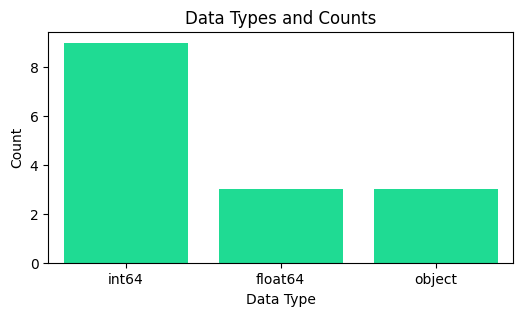

In [7]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Data Type', data=info_table, color='mediumspringgreen')
plt.title('Data Types and Counts')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

# 2. Estadísticas básicas

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
previous_qualification,100.0,8.140,12.644334,1.0,1.00,1.00,10.000,43.0
previous_grade,100.0,149.987,13.692051,120.2,139.45,151.15,157.250,186.9
mother_occupation,100.0,86.180,76.149823,0.0,7.00,99.00,152.250,194.0
father_occupation,100.0,113.940,70.022193,0.0,10.00,135.00,172.250,195.0
admission_grade,100.0,155.422,16.056369,106.4,143.85,155.95,165.225,200.0
displaced,100.0,0.050,0.219043,0.0,0.00,0.00,0.000,1.0
educational_special_needs,100.0,0.030,0.171447,0.0,0.00,0.00,0.000,1.0
gender,100.0,0.420,0.496045,0.0,0.00,0.00,1.000,1.0
scholarship_holder,100.0,0.280,0.451261,0.0,0.00,0.00,1.000,1.0
age_at_enrollment,100.0,19.000,1.912215,17.0,17.00,18.50,20.000,25.0


In [9]:
# descriptive statistics for categorical variables only
df.describe(include='object').T

,count,unique,top,freq
previous_qualification_label,100,15,Secondary education,57
mother_occupation_label,100,30,Unskilled Workers,9
father_occupation_label,95,42,Personal service workers,5


In [10]:
df[df.duplicated(keep=False)]

,previous_qualification,previous_grade,mother_occupation,father_occupation,admission_grade,displaced,educational_special_needs,gender,scholarship_holder,age_at_enrollment,GDP_million_COP,dropout,previous_qualification_label,mother_occupation_label,father_occupation_label


In [11]:
#ver los valores nulos que hay en el dataset
print(df.isnull().sum())

previous_qualification          0
previous_grade                  0
mother_occupation               0
father_occupation               0
admission_grade                 0
displaced                       0
educational_special_needs       0
gender                          0
scholarship_holder              0
age_at_enrollment               0
GDP_million_COP                 0
dropout                         0
previous_qualification_label    0
mother_occupation_label         0
father_occupation_label         5
dtype: int64


In [14]:
null_father = df[df['father_occupation_label'].isnull()]
null_father


,previous_qualification,previous_grade,mother_occupation,father_occupation,admission_grade,displaced,educational_special_needs,gender,scholarship_holder,age_at_enrollment,GDP_million_COP,dropout,previous_qualification_label,mother_occupation_label,father_occupation_label
47,1,129.0,5,173,130.8,0,0,1,1,17,30.3,0,Secondary education,"Personal Services, Security and Safety Workers...",NaN
64,1,153.4,99,125,143.1,0,0,0,1,17,30.3,0,Secondary education,(blank),NaN
69,43,161.7,1,173,150.0,0,0,1,0,20,33.7,0,Higher education - master (2nd cycle),Representatives of the Legislative Power and E...,NaN
86,10,167.4,151,191,106.4,0,0,1,1,19,25.0,1,11th year of schooling - not completed,Personal service workers,NaN
91,9,178.5,9,191,133.5,0,0,1,1,17,30.3,0,12th year of schooling - not completed,Unskilled Workers,NaN


# 3. Revisión por cada columna

previous_qualification

In [ ]:
print(df['previous_qualification'].unique())

[ 1 42 10  3 19  9 14 15 39  5  2 40 43  4 38]


In [16]:
print(df['previous_qualification_label'].unique())

['Secondary education' 'Professional higher technical course'
 '11th year of schooling - not completed' 'Higher education - degree'
 'Basic education 3rd cycle (9th/10th/11th year) or equivalent'
 '12th year of schooling - not completed' '10th year of schooling'
 '10th year of schooling - not completed'
 'Technological specialization course' 'Higher education - doctorate'
 "Higher education - bachelor's degree"
 'Higher education - degree (1st cycle)'
 'Higher education - master (2nd cycle)' "Higher education - master's"
 'Basic education 2nd cycle (6th/7th/8th year) or equivalent']


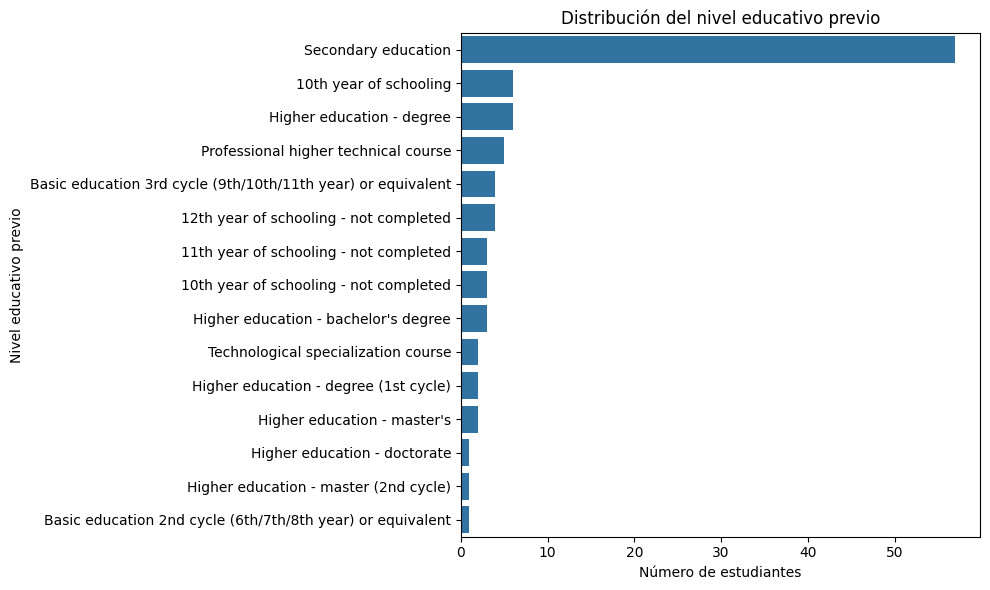

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="previous_qualification_label",
              order=df["previous_qualification_label"].value_counts().index)
plt.title("Distribución del nivel educativo previo")
plt.xlabel("Número de estudiantes")
plt.ylabel("Nivel educativo previo")
plt.tight_layout()
plt.show()

previous_grade

In [ ]:
df['previous_grade'].min(), df['previous_grade'].max()

(np.float64(120.2), np.float64(186.9))

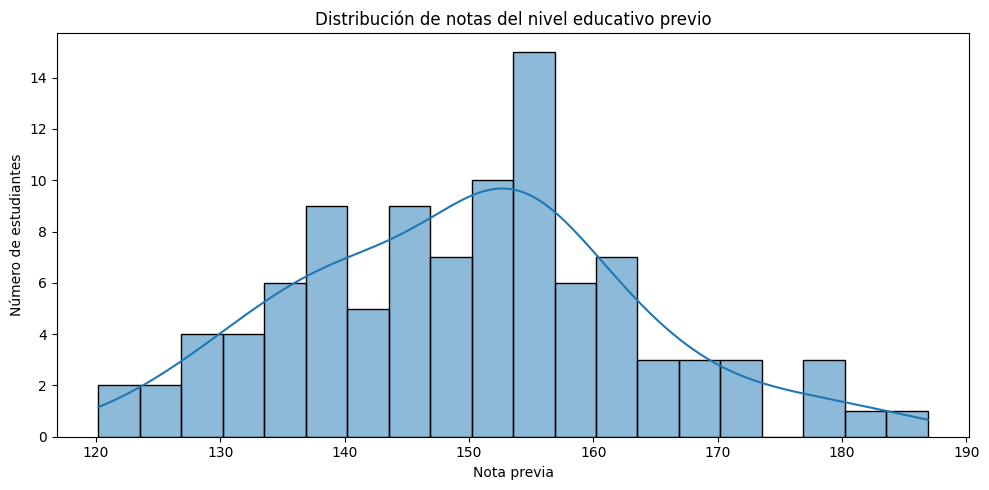

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df["previous_grade"], kde=True, bins=20)
plt.title("Distribución de notas del nivel educativo previo")
plt.xlabel("Nota previa")
plt.ylabel("Número de estudiantes")
plt.tight_layout()
plt.show()

mother_occupation

In [ ]:
print(df['mother_occupation'].unique())

[125  90   6   5   7  10 193   9   2   0 153 122 171  99 132 194   1   8
 191 173 151 143 192 134 131   3 175 123   4 152]


In [20]:
print(df['mother_occupation_label'].unique())

['Specialists in information and communication technologies (ICT)'
 'Other Situation'
 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry'
 'Personal Services, Security and Safety Workers and Sellers'
 'Skilled Workers in Industry, Construction and Craftsmen'
 'Armed Forces Professions'
 'Unskilled workers in extractive industry, construction, manufacturing and transport'
 'Unskilled Workers'
 'Specialists in Intellectual and Scientific Activities' 'Student'
 'Personal care workers and the like' 'Health professionals'
 'Skilled construction workers and the like, except electricians'
 '(blank)'
 'Technicians and professionals, of intermediate level of health'
 'Meal preparation assistants'
 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers'
 'Installation and Machine Operators and Assembly Workers'
 'Cleaning workers'
 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the li

father_occupation

In [21]:
print(df['father_occupation'].unique())

[151  99  10 172   1 103   9 171   2   7 161 102 182 114 192   6 101 152
 174 175 195  90 154 121 193 194 183 122 123 132 173   4   0 153 135 125
 143 163   8   5 181 141 131 191 112]


In [22]:
print(df['father_occupation_label'].unique())

['Personal service workers' '(blank)' 'Armed Forces Professions'
 'Skilled workers in metallurgy, metalworking and similar'
 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers'
 'Other Armed Forces personnel' 'Unskilled Workers'
 'Skilled construction workers and the like, except electricians'
 'Specialists in Intellectual and Scientific Activities'
 'Skilled Workers in Industry, Construction and Craftsmen'
 'Market-oriented farmers and skilled agricultural and animal production workers'
 'Armed Forces Sergeants' 'Assembly workers'
 'Hotel, catering, trade and other services directors'
 'Unskilled workers in agriculture, animal production, fisheries and forestry'
 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry'
 'Armed Forces Officers' 'Sellers'
 'Skilled workers in electricity and electronics'
 'Workers in food processing, woodworking, clothing and other industries and crafts'
 'Street vendors (except food) 

admission_grade

In [28]:
df['admission_grade'].min(), df['admission_grade'].max()

(np.float64(106.4), np.float64(200.0))

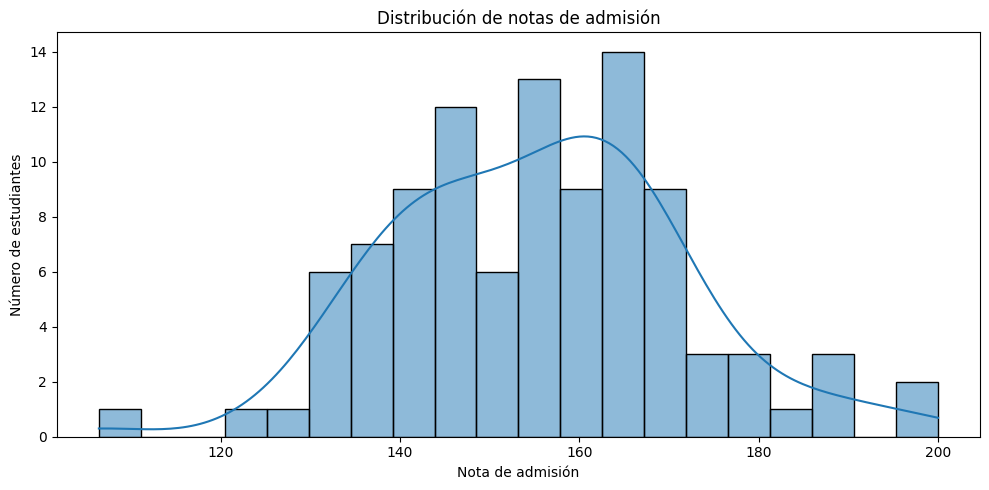

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(df["admission_grade"], kde=True, bins=20)
plt.title("Distribución de notas de admisión")
plt.xlabel("Nota de admisión")
plt.ylabel("Número de estudiantes")
plt.tight_layout()
plt.show()

displaced

In [38]:
df["displaced"].value_counts()

displaced
0    95
1     5
Name: count, dtype: int64

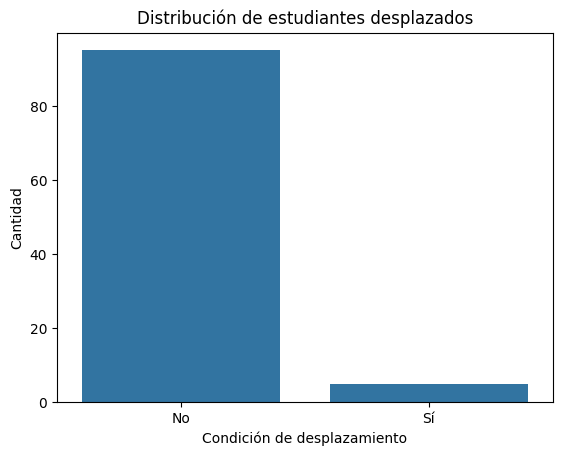

In [39]:
sns.countplot(data=df, x="displaced")
plt.title("Distribución de estudiantes desplazados")
plt.xlabel("Condición de desplazamiento")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

educational_special_needs

In [36]:
df["educational_special_needs"].value_counts()

educational_special_needs
0    97
1     3
Name: count, dtype: int64

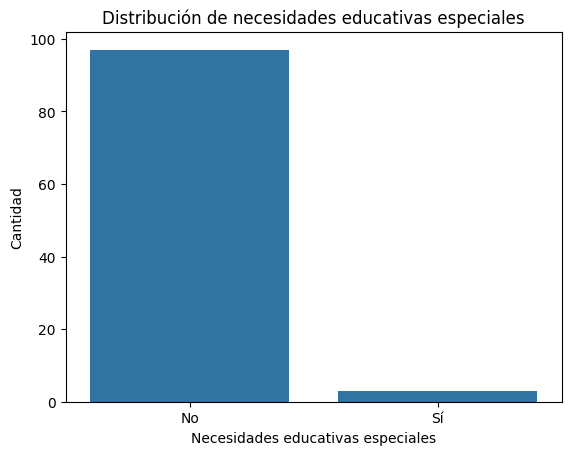

In [37]:
sns.countplot(data=df, x="educational_special_needs")
plt.title("Distribución de necesidades educativas especiales")
plt.xlabel("Necesidades educativas especiales")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

gender

In [34]:
df["gender"].value_counts()

gender
0    58
1    42
Name: count, dtype: int64

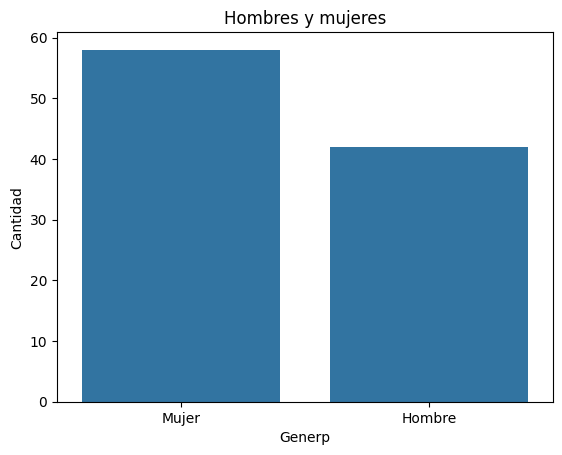

In [35]:
sns.countplot(data=df, x="gender")
plt.title("Hombres y mujeres")
plt.xlabel("Generp")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ["Mujer", "Hombre"])
plt.show()

scholarship_holder

In [32]:
df["scholarship_holder"].value_counts()

scholarship_holder
0    72
1    28
Name: count, dtype: int64

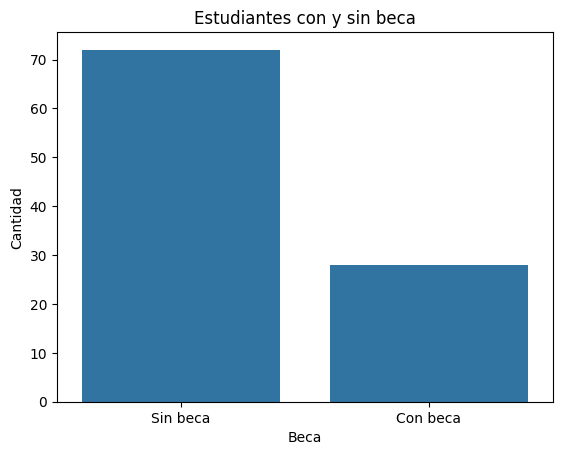

In [33]:
sns.countplot(data=df, x="scholarship_holder")
plt.title("Estudiantes con y sin beca")
plt.xlabel("Beca")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ["Sin beca", "Con beca"])
plt.show()

age_at_enrollment

In [41]:
df['age_at_enrollment'].min(), df['age_at_enrollment'].max()

(np.int64(17), np.int64(25))

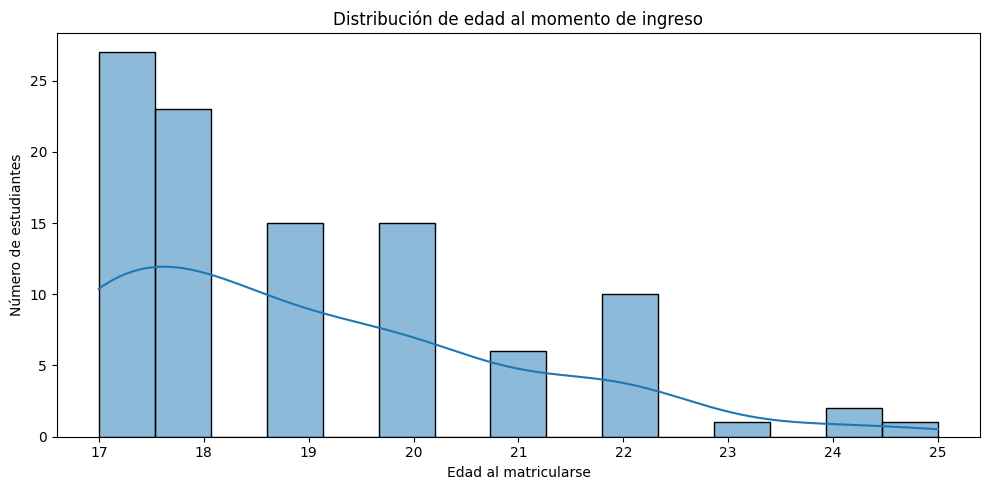

In [42]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age_at_enrollment'], bins=15, kde=True)
plt.title("Distribución de edad al momento de ingreso")
plt.xlabel("Edad al matricularse")
plt.ylabel("Número de estudiantes")
plt.tight_layout()
plt.show()

GDP_million_COP

In [44]:
df['GDP_million_COP'].min(), df['GDP_million_COP'].max()

(np.float64(20.0), np.float64(49.7))

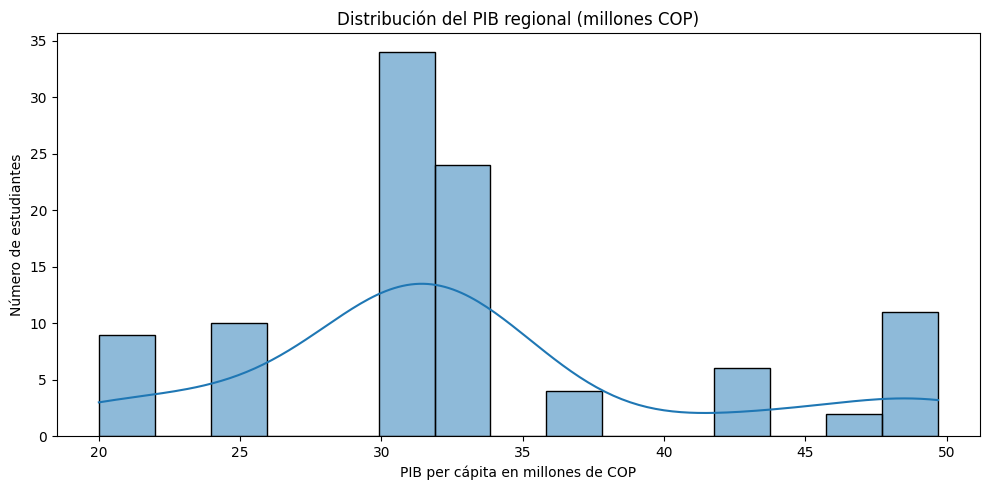

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(df["GDP_million_COP"], bins=15, kde=True)
plt.title("Distribución del PIB regional (millones COP)")
plt.xlabel("PIB per cápita en millones de COP")
plt.ylabel("Número de estudiantes")
plt.tight_layout()
plt.show()

dropout

In [30]:
df["dropout"].value_counts()

dropout
0    83
1    17
Name: count, dtype: int64

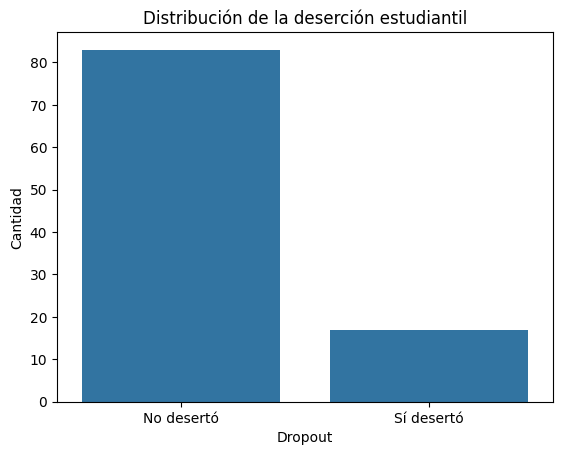

In [31]:
sns.countplot(data=df, x="dropout")
plt.title("Distribución de la deserción estudiantil")
plt.xlabel("Dropout")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ["No desertó", "Sí desertó"])
plt.show()

# Análisis y correlaciones importantes

### 1. Boxplots de notas por género y por beca


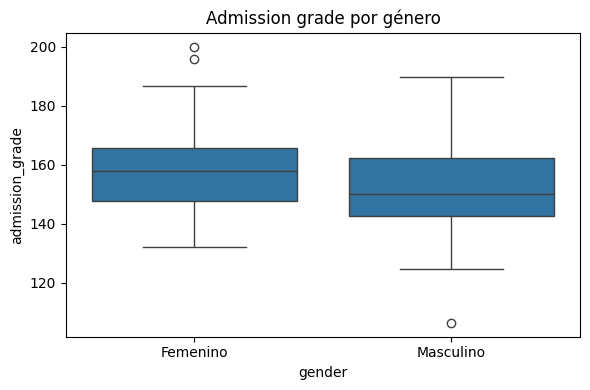

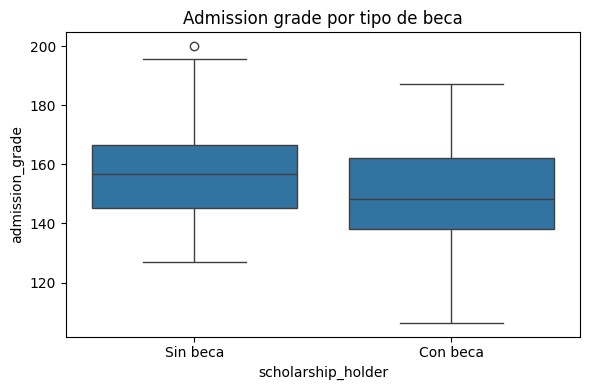

In [48]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="gender", y="admission_grade", data=df)
plt.xticks([0, 1], ["Femenino", "Masculino"])
plt.title("Admission grade por género")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="scholarship_holder", y="admission_grade", data=df)
plt.xticks([0, 1], ["Sin beca", "Con beca"])
plt.title("Admission grade por tipo de beca")
plt.tight_layout()
plt.show()

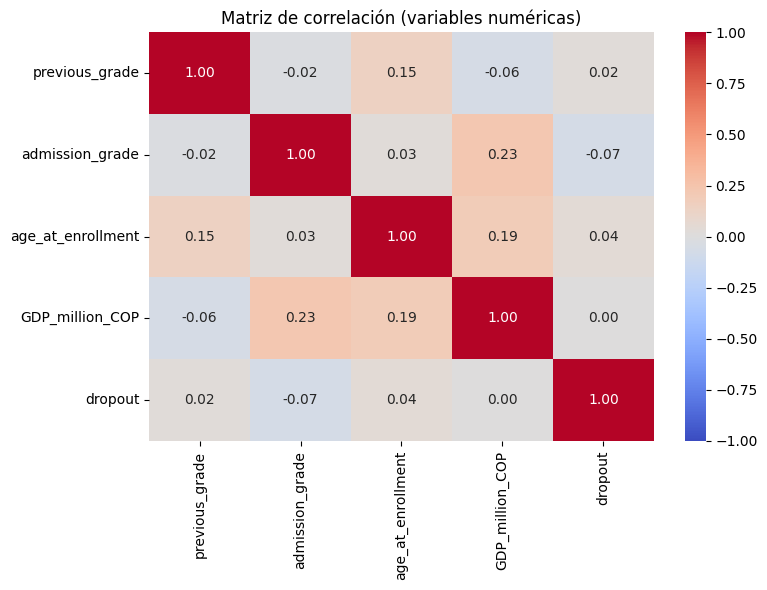

In [61]:
num_cols = [
    "previous_grade", "admission_grade", "age_at_enrollment",
    "GDP_million_COP", "dropout"
]

plt.figure(figsize=(8, 6))
corr = df[num_cols].corr(method="pearson")
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación (variables numéricas)")
plt.tight_layout()
plt.show()


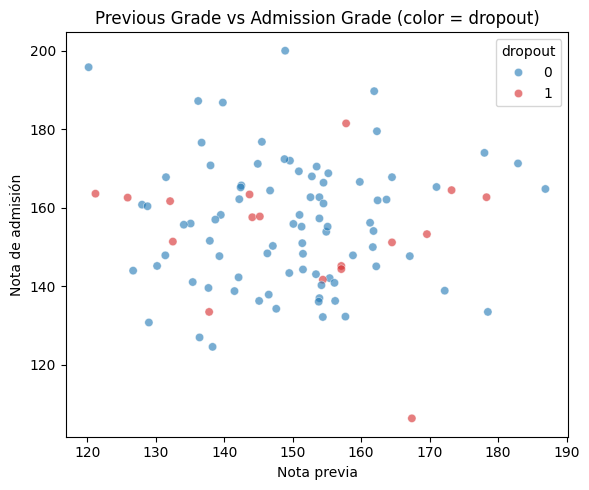

In [62]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="previous_grade", y="admission_grade",
                hue="dropout", palette={0:"tab:blue", 1:"tab:red"}, alpha=0.6)
plt.title("Previous Grade vs Admission Grade (color = dropout)")
plt.xlabel("Nota previa")
plt.ylabel("Nota de admisión")
plt.tight_layout()
plt.show()

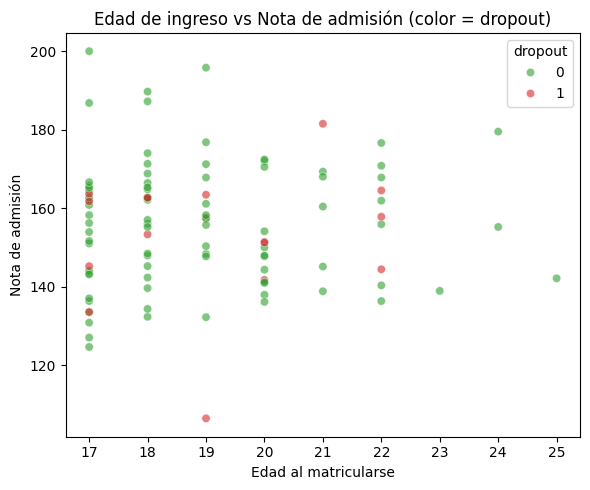

In [63]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="age_at_enrollment", y="admission_grade",
                hue="dropout", palette={0:"tab:green", 1:"tab:red"}, alpha=0.6)
plt.title("Edad de ingreso vs Nota de admisión (color = dropout)")
plt.xlabel("Edad al matricularse")
plt.ylabel("Nota de admisión")
plt.tight_layout()
plt.show()


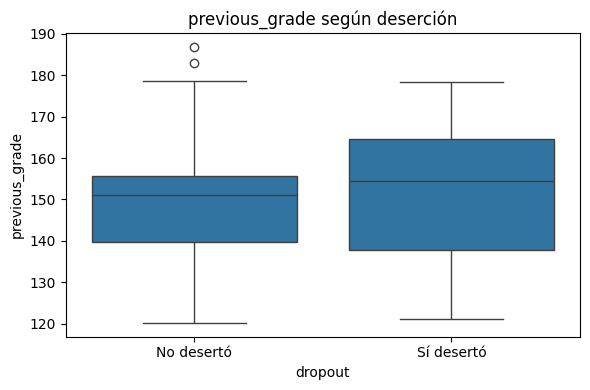

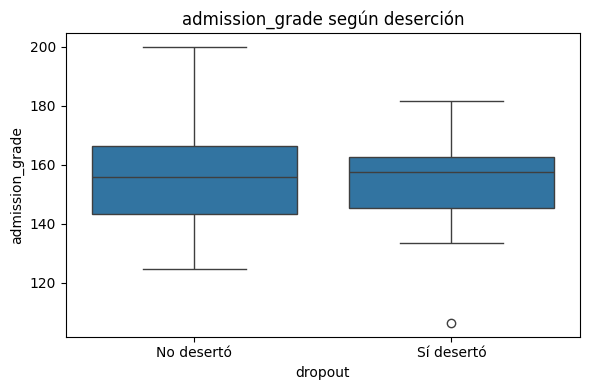

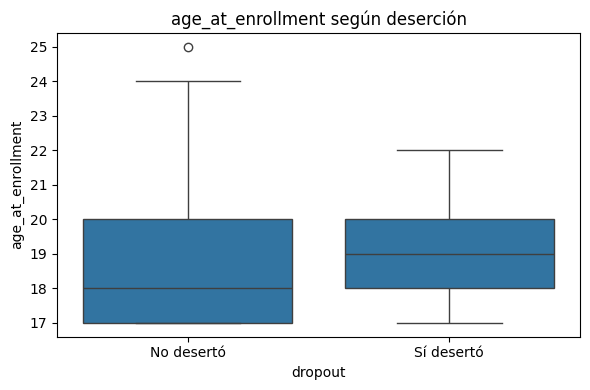

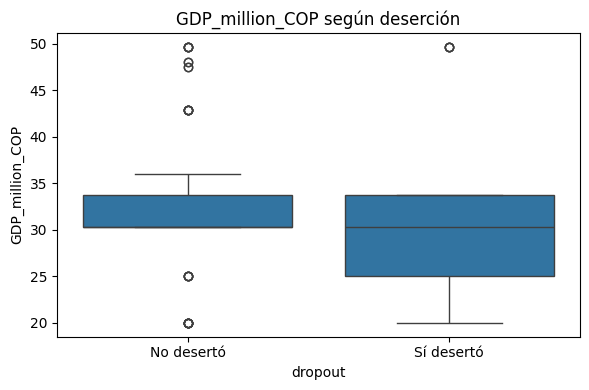

In [65]:
num_box = ["previous_grade", "admission_grade", "age_at_enrollment", "GDP_million_COP"]

for col in num_box:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x="dropout", y=col)
    plt.xticks([0, 1], ["No desertó", "Sí desertó"])
    plt.title(f"{col} según deserción")
    plt.tight_layout()
    plt.show()

# 7. Agrupaciones estadísticas útiles

In [49]:
print("\nPromedio de Admission grade por condición de desplazado:")
print(df.groupby("displaced")["admission_grade"].describe())



Promedio de Admission grade por condición de desplazado:
           count    mean        std    min     25%    50%    75%    max
displaced                                                              
0           95.0  155.78  16.244525  106.4  144.15  156.0  165.5  200.0
1            5.0  148.62  10.888388  136.3  141.70  145.2  158.2  161.7


In [50]:
print("\nPromedio de Admission grade por género:")
print(df.groupby("gender")["admission_grade"].describe())


Promedio de Admission grade por género:
        count        mean        std    min      25%     50%      75%    max
gender                                                                      
0        58.0  157.755172  15.266810  132.2  147.750  158.00  165.600  200.0
1        42.0  152.200000  16.737456  106.4  142.725  150.15  162.175  189.7


In [51]:
print("\nPromedio de GDP por beca:")
print(df.groupby("scholarship_holder")["GDP_million_COP"].describe())


Promedio de GDP por beca:
                    count       mean       std   min   25%   50%   75%   max
scholarship_holder                                                          
0                    72.0  33.552778  8.555387  20.0  30.3  31.7  36.0  49.7
1                    28.0  31.596429  6.527746  20.0  30.3  30.3  33.1  49.7


Promedio de nota de admisión por tipo de educación previa

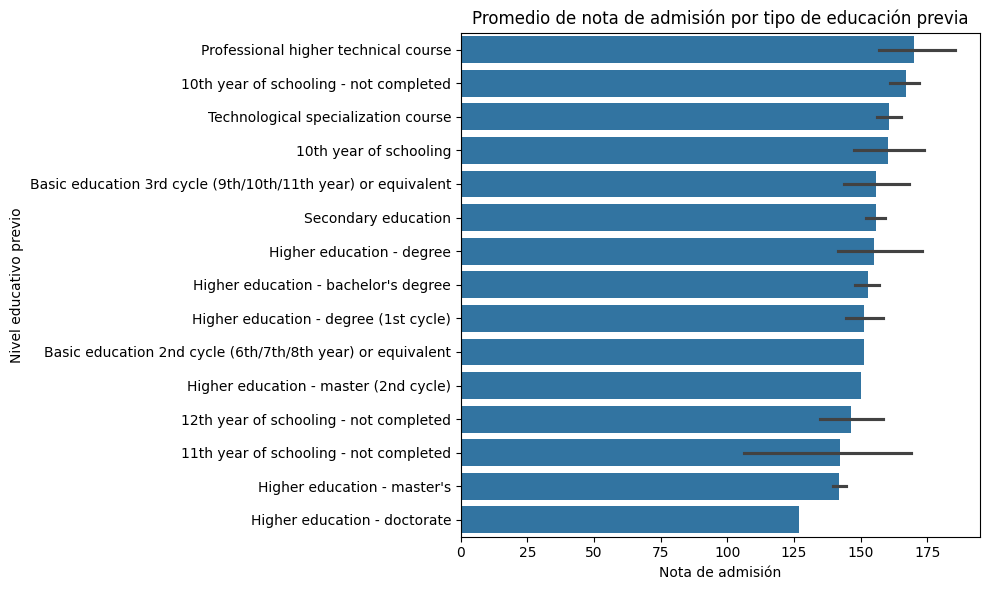

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Promedio de nota de admisión por nivel educativo previo
plt.figure(figsize=(10, 6))
sns.barplot(data=df,
            x="admission_grade",
            y="previous_qualification_label",
            order=df.groupby("previous_qualification_label")["admission_grade"].mean().sort_values(ascending=False).index)
plt.title("Promedio de nota de admisión por tipo de educación previa")
plt.xlabel("Nota de admisión")
plt.ylabel("Nivel educativo previo")
plt.tight_layout()
plt.show()


In [24]:
df.columns

Index(['previous_qualification', 'previous_grade', 'mother_occupation',
       'father_occupation', 'admission_grade', 'displaced',
       'educational_special_needs', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'GDP_million_COP', 'dropout',
       'previous_qualification_label', 'mother_occupation_label',
       'father_occupation_label', 'Previous qualification label',
       'Mother occupation label', 'Father occupation label'],
      dtype='object')

# Modelo


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Columnas que parecen relevantes (eliminando las versiones de texto de las categóricas)
features = ['previous_qualification', 'previous_grade', 'mother_occupation', 
            'father_occupation', 'admission_grade', 'displaced', 
            'educational_special_needs', 'gender', 'scholarship_holder', 
            'age_at_enrollment', 'GDP_million_COP']

target = 'dropout'

# Seleccionar solo las columnas necesarias
data = df[features + [target]]

previous_qualification       0
previous_grade               0
mother_occupation            0
father_occupation            0
admission_grade              0
displaced                    0
educational_special_needs    0
gender                       0
scholarship_holder           0
age_at_enrollment            0
GDP_million_COP              0
dropout                      0
dtype: int64
       previous_qualification  previous_grade  mother_occupation  \
count              100.000000      100.000000         100.000000   
mean                 8.140000      149.987000          86.180000   
std                 12.644334       13.692051          76.149823   
min                  1.000000      120.200000           0.000000   
25%                  1.000000      139.450000           7.000000   
50%                  1.000000      151.150000          99.000000   
75%                 10.000000      157.250000         152.250000   
max                 43.000000      186.900000         194.000000   

  

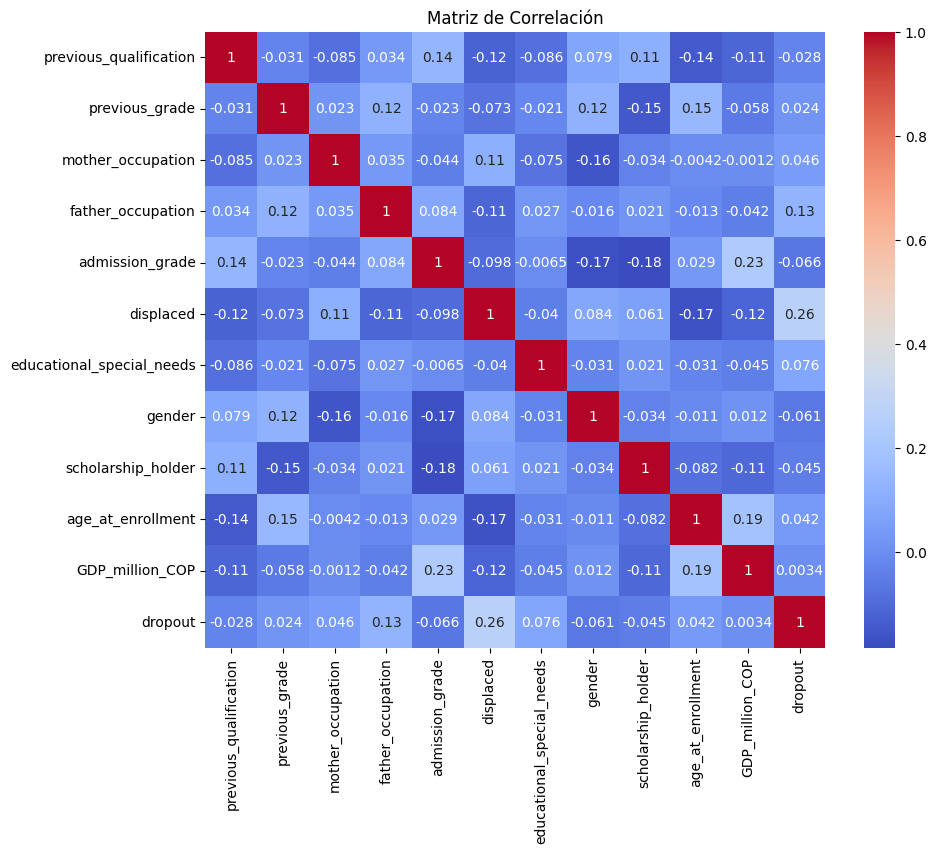

In [30]:
# Verificar valores nulos
print(data.isnull().sum())

# Estadísticas descriptivas
print(data.describe())

# Distribución de la variable objetivo
print(data[target].value_counts(normalize=True))

# Visualizar correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [31]:
# Dividir en características (X) y objetivo (y)
X = data[features]
y = data[target]

# Dividir en conjuntos de entrenamiento y prueba (70-30 o 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Ratio de clases (negativo/positivo): 4.83

Distribución de clases después de SMOTE:
dropout
0    58
1    58
Name: count, dtype: int64

Entrenando Random Forest balanceado...

Random Forest Balanceado - Performance:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.20      0.20      0.20         5

    accuracy                           0.73        30
   macro avg       0.52      0.52      0.52        30
weighted avg       0.73      0.73      0.73        30

ROC AUC: 0.408


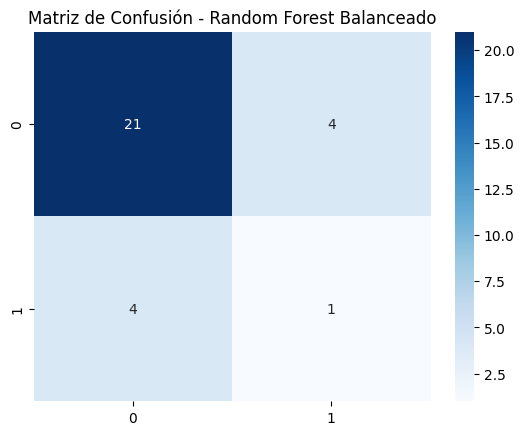


Entrenando XGBoost balanceado...

XGBoost Balanceado - Performance:


C:\Users\saale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:06:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.17      0.20      0.18         5

    accuracy                           0.70        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.72      0.70      0.71        30

ROC AUC: 0.496


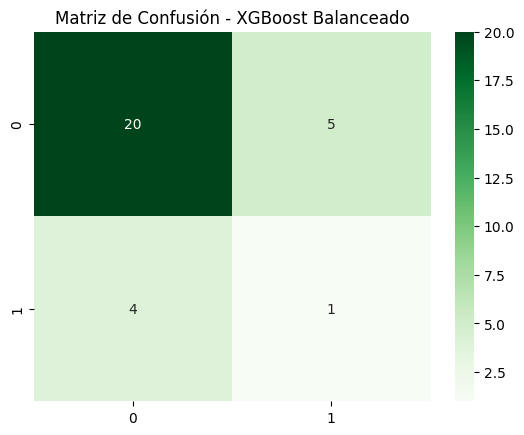


Comparación de ROC AUC:
- Random Forest: 0.408
- XGBoost: 0.496

Importancia de características - Random Forest:
                      feature  importance
4             admission_grade    0.250619
2           mother_occupation    0.186930
3           father_occupation    0.148294
10            GDP_million_COP    0.114200
1              previous_grade    0.099225
7                      gender    0.097477
9           age_at_enrollment    0.047385
0      previous_qualification    0.032064
8          scholarship_holder    0.023021
5                   displaced    0.000785
6   educational_special_needs    0.000000


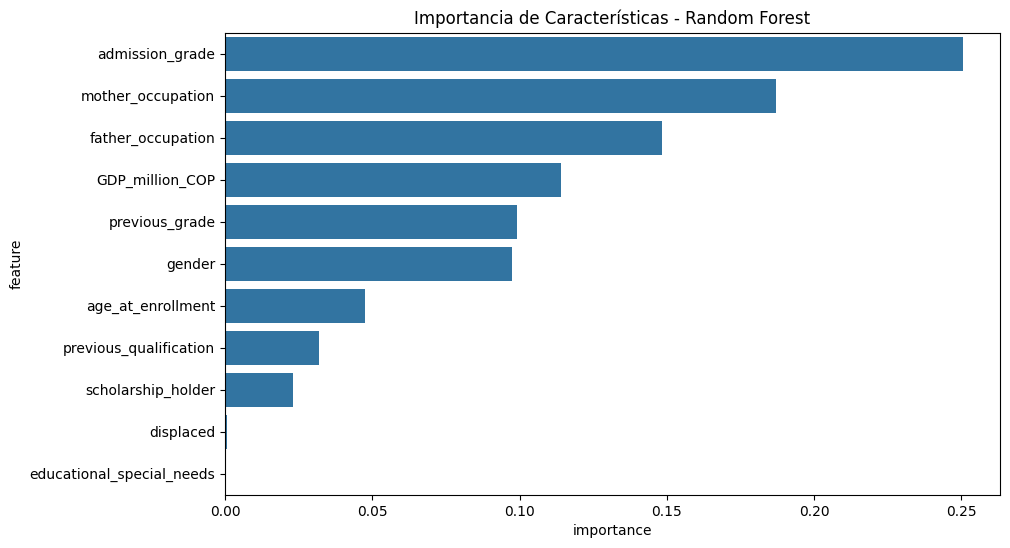

In [34]:
from imblearn.over_sampling import SMOTE

# 3. Calcular el ratio de clases para XGBoost
ratio_clases = sum(y_train == 0) / sum(y_train == 1)
print(f"Ratio de clases (negativo/positivo): {ratio_clases:.2f}")

# 4. Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificar el balance después de SMOTE
print("\nDistribución de clases después de SMOTE:")
print(pd.Series(y_train_bal).value_counts())

# 5. Entrenar Random Forest balanceado
print("\nEntrenando Random Forest balanceado...")
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)
rf_balanced.fit(X_train_bal, y_train_bal)

# Evaluar Random Forest
y_pred_rf = rf_balanced.predict(X_test)
y_prob_rf = rf_balanced.predict_proba(X_test)[:, 1]

print("\nRandom Forest Balanceado - Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.3f}")

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest Balanceado')
plt.show()

# 6. Entrenar XGBoost balanceado
print("\nEntrenando XGBoost balanceado...")
xgb_balanced = XGBClassifier(
    scale_pos_weight=ratio_clases,
    eval_metric='aucpr',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False
)
xgb_balanced.fit(X_train_bal, y_train_bal)

# Evaluar XGBoost
y_pred_xgb = xgb_balanced.predict(X_test)
y_prob_xgb = xgb_balanced.predict_proba(X_test)[:, 1]

print("\nXGBoost Balanceado - Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.3f}")

# Matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - XGBoost Balanceado')
plt.show()

# 7. Comparación de modelos
print("\nComparación de ROC AUC:")
print(f"- Random Forest: {roc_auc_score(y_test, y_prob_rf):.3f}")
print(f"- XGBoost: {roc_auc_score(y_test, y_prob_xgb):.3f}")

# 8. Análisis de importancia de características (para el mejor modelo)
print("\nImportancia de características - Random Forest:")
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': rf_balanced.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importances)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importancia de Características - Random Forest')
plt.show()